In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
f1=pd.read_csv("./files/Social_Network_Ads.csv")
df2=f1

In [96]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [97]:
df=f1.iloc[:,2:]

In [98]:
df.sample(5)

,Age,EstimatedSalary,Purchased
214,47,43000,0
183,33,43000,0
289,37,78000,1
210,48,96000,1
215,60,108000,1


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [100]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Purchased"]),df["Purchased"],test_size=0.3,random_state=0)

In [101]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [103]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [104]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [105]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=x_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=x_test.columns)

In [106]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [107]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


Plot before after effect of every column applied standardiazation

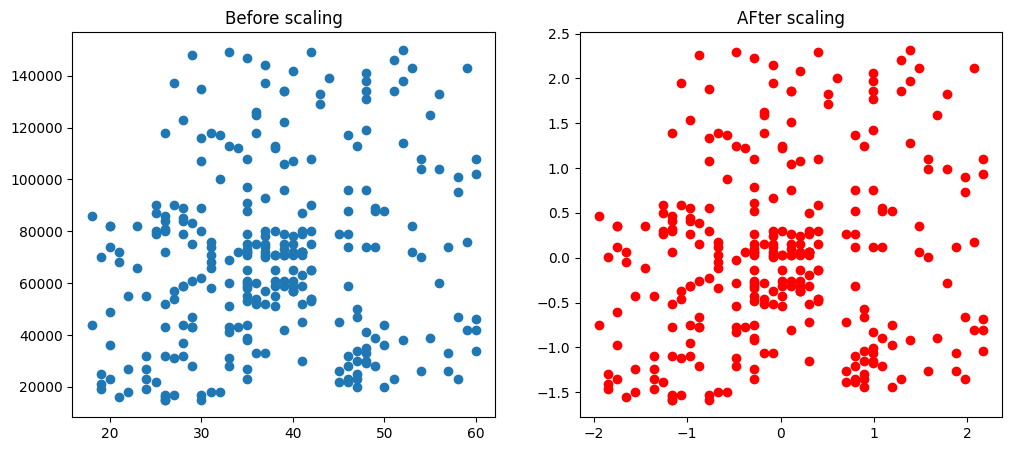

In [108]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
ax1.scatter("Age","EstimatedSalary",marker="o",data=x_train)
ax2.set_title("AFter scaling")
ax2.scatter("Age","EstimatedSalary",marker="o",data=X_train_scaled,color="red")

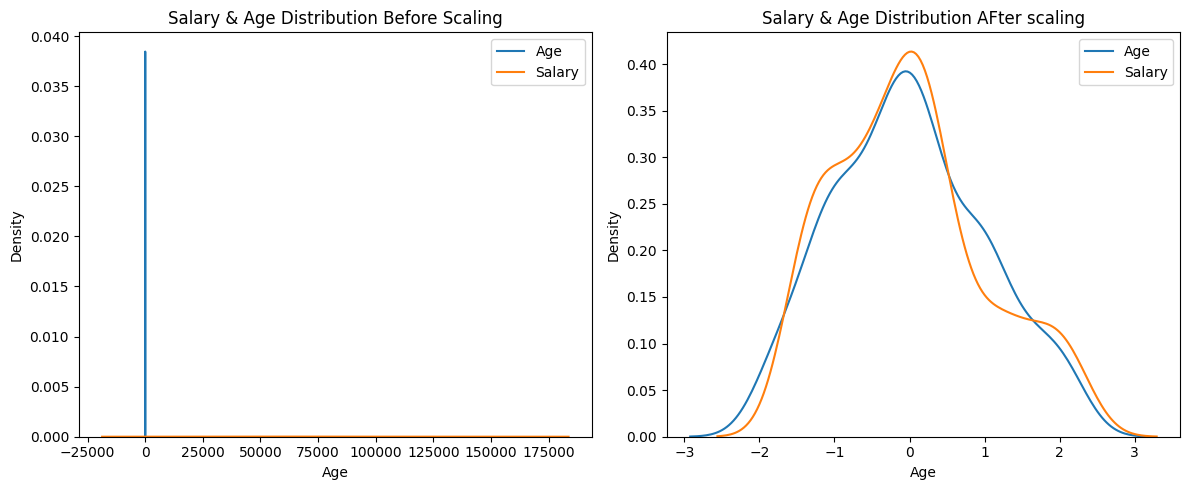

In [109]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Salary & Age Distribution Before Scaling')
sns.kdeplot(x_train["Age"],ax=ax1,label="Age")
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1,label="Salary")
ax1.legend()
ax2.set_title("Salary & Age Distribution AFter scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2,label="Age")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2,label="Salary")
ax2.legend()
fig.tight_layout()

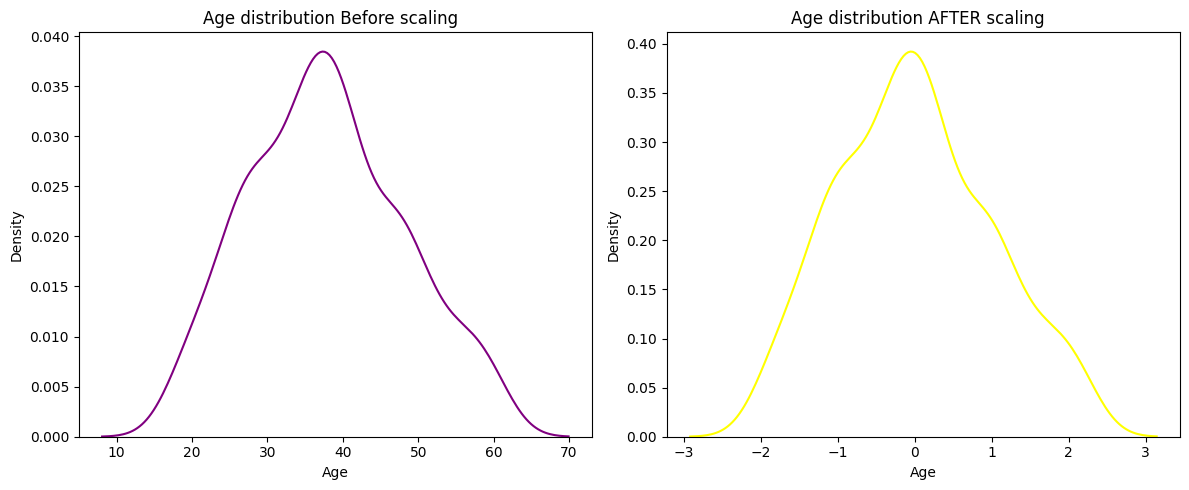

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scaling
ax1.set_title("Age distribution Before scaling  ")
sns.kdeplot(x_train["Age"],ax=ax1,color="purple")
#after scaling
ax2.set_title("Age distribution AFTER scaling  ")
sns.kdeplot(X_train_scaled["Age"],ax=ax2,color="yellow")

fig.tight_layout()


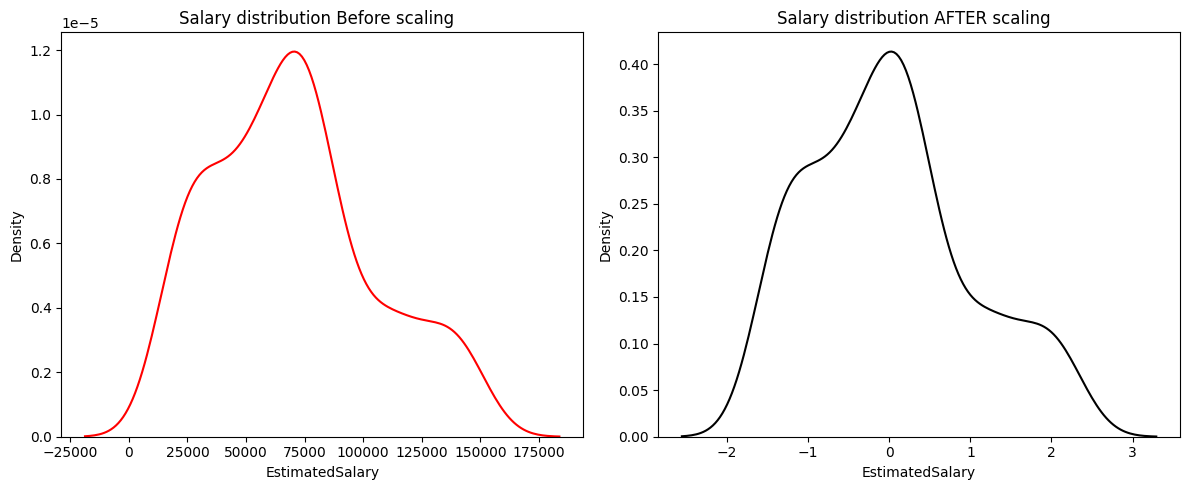

In [111]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scaling
ax1.set_title("Salary distribution Before scaling  ")
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1,color="red")
#after scaling
ax2.set_title("Salary distribution AFTER scaling  ")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2,color="black")

fig.tight_layout()

Scaling is important to improve the accuracy and we are going to use logistic regression model on the preprocessed data

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [113]:
learn=LogisticRegression()
learn_scaled=LogisticRegression()

In [114]:
learn.fit(x_train,y_train)
learn_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [115]:
y_pred=learn.predict(x_test)
y_pred_scaled=learn_scaled.predict(X_test_scaled)

In [116]:
print("Actual accuracy score",accuracy_score(y_test,y_pred))
print("Scaled accuracy score",accuracy_score(y_test,y_pred_scaled))

Actual accuracy score 0.6583333333333333
Scaled accuracy score 0.8666666666666667


In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [119]:
dt.fit(x_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [120]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [121]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [122]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Outlier:it is dataadded on the dataset which is very diiferent and it can cause various effects on statistics and now we will see the effects

In [136]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [139]:
m=len(df)

In [160]:
df.loc[len(df)]=[5, 1000, 0]
df.loc[len(df)]=[90, 250000, 1]
df.loc[len(df)]=[95, 350000, 1]

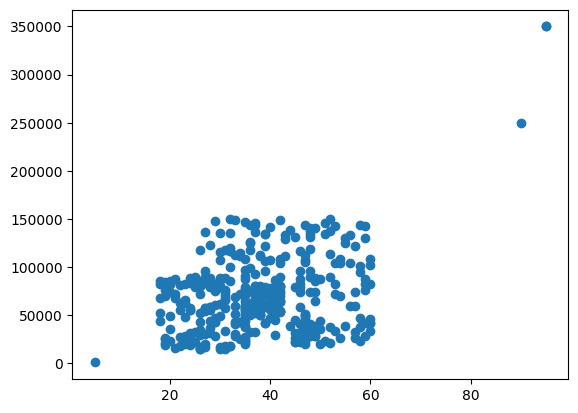

In [161]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (122, 2))

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

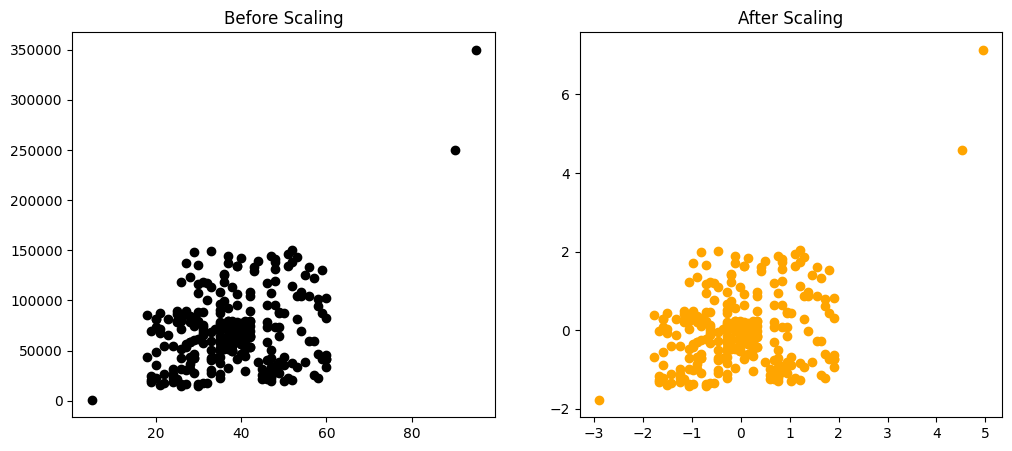

In [166]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'],color="black")
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='orange')
ax2.set_title("After Scaling")
plt.show()